In [106]:
%load_ext autoreload
%autoreload 2

import os
import random

import numpy as np
import torch
import matplotlib.pyplot as plt
opj = os.path.join
import pickle as pkl
import argparse
import torchvision
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# adaptive-wavelets modules
from awd.awd.losses import get_loss_f
from awd.awd.train import Trainer
from awd.awd.utils import get_wavefun
from awd.awd.evaluate import Validator
from awd.awd.transform2d import DWT2d

from awd.mdata.mnist import get_dataloader, load_pretrained_model

from awd.awd.warmstart import warm_start

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


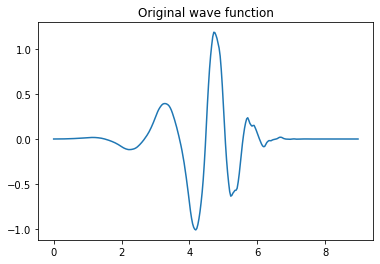

In [111]:
wave = 'db5'
mode = 'zero' # mode of wavelet boundary
J = 4


wt = DWT2d(wave=wave,
           mode=mode,
           J=J,
          ).to(device)
phi_orig, psi_orig, x_orig = get_wavefun(wt)
plt.plot(x_orig, psi_orig)
plt.title('Original wave function')
plt.show()

In [112]:
data_path = "../../src/dsets/mnist/data"
transformer = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])
train_dataset = torchvision.datasets.MNIST(root=data_path,
                                           train=True,
                                           download=True,
                                           transform=transformer)
X = train_dataset.data

In [115]:
# note could pass in a dataloader instead
wt.fit(X=X, lr=1e-2, num_epochs=8)

Starting Training Loop...
Train Epoch: 0 [0/60000 (0%)]	Loss: 161162.546875+0.000001j
====> Epoch: 0 Average train loss: 161162.5469+0.0000j
Train Epoch: 1 [0/60000 (0%)]	Loss: 475696.562500+0.000001j
====> Epoch: 1 Average train loss: 475696.5625+0.0000j
Train Epoch: 2 [0/60000 (0%)]	Loss: 312685.625000+0.000001j
====> Epoch: 2 Average train loss: 312685.6250+0.0000j
Train Epoch: 3 [0/60000 (0%)]	Loss: 45223.867188+0.000001j
====> Epoch: 3 Average train loss: 45223.8672+0.0000j
Train Epoch: 4 [0/60000 (0%)]	Loss: 95602.703125+0.000001j
====> Epoch: 4 Average train loss: 95602.7031+0.0000j
Train Epoch: 5 [0/60000 (0%)]	Loss: 213742.328125+0.000001j
====> Epoch: 5 Average train loss: 213742.3281+0.0000j
Train Epoch: 6 [0/60000 (0%)]	Loss: 70654.804688+0.000001j
====> Epoch: 6 Average train loss: 70654.8047+0.0000j
Train Epoch: 7 [0/60000 (0%)]	Loss: 40620.695312+0.000001j
====> Epoch: 7 Average train loss: 40620.6953+0.0000j


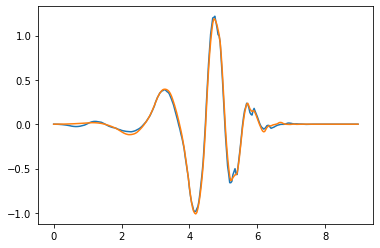

In [116]:
phi, psi, x = get_wavefun(wt)
plt.plot(x, psi)
plt.plot(x_orig, psi_orig)